ЛАБОРАТОРНАЯ РАБОТА 3. МЕТРИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ

Цель лабораторной работы: изучение
принципов построения информационных систем с использованием метрических методов классификации.
Основные задачи:
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций KNN-метода.

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
uploaded = files.upload()

Saving iris.data to iris.data


In [ ]:
data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',')
d.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
d = pd.read_table(data_source, delimiter=',', header=None)
d.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
d = pd.read_table(data_source, delimiter=',',
header=None,
#аргумент, который задает имена столбцов для данных
names=['sepal_length','sepal_width',
'petal_length','petal_width', 'answer'])
d.head()

,sepal_length,sepal_width,petal_length,petal_width,answer
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. После загрузки данных можно визуализировать полученныйы
набор данных. Для визуализации будем использовать библиотеку seaborn.
В результате будет выведен график, отображающий распределение
объектов попарно по различным признакам
На графике попарного распределения видно преимущество символьного
обозначения столбцов – график легче интерпретировать. Отдельные классы не
отмечаются различными цветами, но видно, что на отдельных подграфиках
множества точек разделены. Следует обратить внимание на подграфики,
расположенные по диаганали. Подумайте, что они отображают?

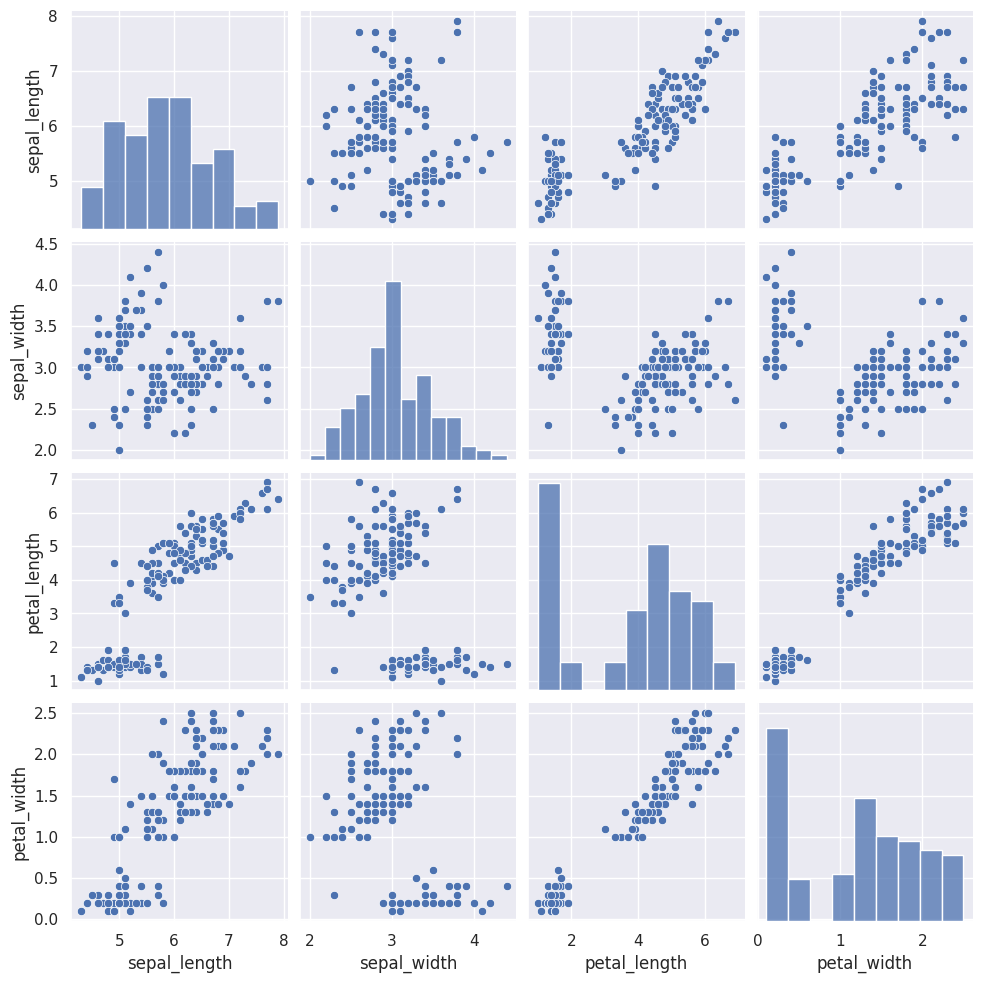

In [ ]:
#%matplotlib inline используется чтобы графики, построенные с помощью Matplotlib или Seaborn, отображались непосредственно внутри Jupyter Notebook, а не в отдельных окнах.
%matplotlib inline
#построение парных графиков
sns.pairplot(d)

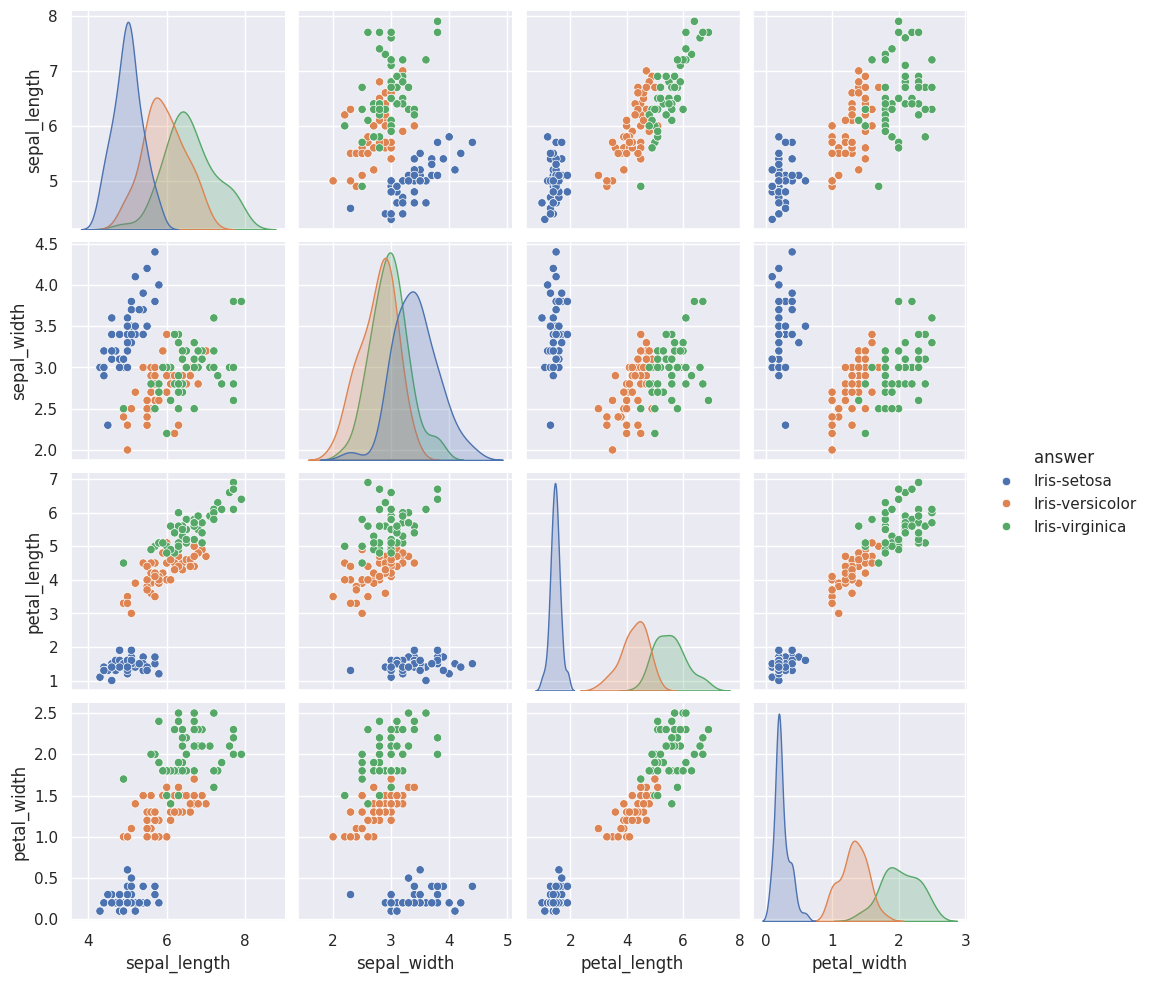

In [ ]:
%matplotlib inline
sns.pairplot(d, hue='answer') #Указываем по какому признаку разделяются точки

4. Перейдем к построению модели.** Модель метрической
классификации должна обеспечивать следующий алгоритм работы:
пользователь вводит новое признаковое описание объекта (объект отсутствует
в обучающей выборке), а алгоритм классификации относит новый объект к
одному из классов ирисов.

5. Существует несколько вариаций метода ближайших соседей.**
Каждая модель предполагает наличие различных параметров для
оптимизации. Воспользуемся библиотекой scikit для построения
классификатора

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Это матрица признаков, которая содержит данные
X_train = d[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Это вектор с целевыми метками (ответами), который содержит классы, которые мы хотим предсказать
y_train = d['answer']
# Количество ближайших соседей, которых алгоритм будет учитывать при принятии решения
K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# Построение модели классификатора (процедура обучения)
# Метод fit() обучает классификатор на основе обучающих данных
# X_train — это матрица признаков, по которой алгоритм будет искать закономерности.
# y_train — это целевые метки, которые являются правильными ответами для данных из X_train.
# Модель будет "учиться" на этих данных и подбирать такие параметры, чтобы предсказывать y_train как можно точнее.
knn.fit(X_train, y_train)
# Использование классификатора
# Объявление признаков объекта
# Это массив с новым объектом, для которого мы хотим сделать предсказание
X_test = np.array([[0.3, 1.0, 2.8, 1.2]])
# Получение ответа для нового объекта
# С помощью метода predict() классификатор делает предсказание для переданных данных X_test.
# Модель классифицирует этот объект в один из классов, основанных на том, какие классы чаще всего встречаются среди его 3-х ближайших соседей.
target = knn.predict(X_test)

print(target)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


6. Модель построена и выдает ответ для новых (отсутствующих в
исходной выборке) объектов.** Но,следует отметить
следующие недостатки такого подхода:

– в качестве количества ближайших соседей выбрано значение K=3,
выбор данного значения не обосновывается, но в данном методе именно
данный параметр должен оптимизироваться;

– отсутствует какое-либо графическое представление модели, нет визуализации процесса принятия решения.

Исправим данные недостатки.

7. Займемся обоснованием выбора оптимального значения
количества ближайших соседей.** Для этого будем использовать простейшую оценку качества hold-out


In [ ]:
# Функция для разбития данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
# Признаки для обучения, признаки для тестирования.
# Ответы для обучения, ответы для тестирования
X_train, X_holdout, y_train, y_holdout = \
  train_test_split(d[['sepal_length','sepal_width',
  'petal_length', 'petal_width']],
  d['answer'],
  test_size=0.3, # Доля тестовой выборки
  random_state=17) # Фиксирует случайность при разбиении данных, чтобы результат был воспроизводим
knn = KNeighborsClassifier(n_neighbors=3) # Количество соседей, которые будут использоваться для классификации.
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)
# Предсказываем метки класса на новых данных
# X_holdout — Признаки тестовой выборки, которые модель не видела во время обучения.
knn_pred = knn.predict(X_holdout) # Массив предсказанных моделью классов для объектов из X_holdout.
# Функция accuracy_score() вычисляет долю правильных предсказаний:
# y_holdout — Истинные метки классов для тестовой выборки.
accur = accuracy_score(y_holdout, knn_pred) # Результат вычисления, показывающий точность классификации
print('accuracy: ', accur)

accuracy:  0.9777777777777777


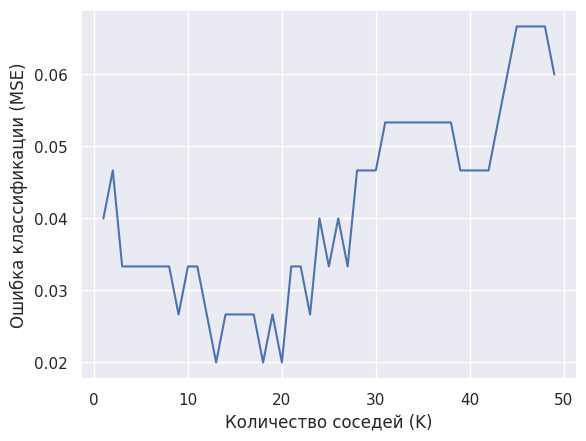

Оптимальные значения K:  [13, 18, 20]


In [ ]:
# cross_val_score используется для оценки качества модели с использованием кросс-валдиации
from sklearn.model_selection import cross_val_score
# Значения параметра К
k_list = list(range(1,50))
# Пустой список для хранения значений точности для каждого K
cv_scores = []
# В цикле проходим все значения К
for K in k_list:
  #Создается классификатор knn с параметром n_neighbors=K
  knn = KNeighborsClassifier(n_neighbors=K)

  # Признаки: d.iloc[:, 0:4] (первые 4 столбца)
  # d['answer'] - целевая переменная
  # Данные делятся на 10 равных частей
  # Метрика: accuracy
  scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
  # Средняя точность для текущего K вычисляется и добавляется в cv_scores.
  cv_scores.append(scores.mean())
# Вычисляем ошибку (misclassification error) как MSE = 1 − accuracy.
MSE = [1-x for x in cv_scores]
# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()
# Ищем минимум
k_min = min(MSE) # минимальное значение ошибки MSE.
# Пробуем найти прочие минимумы (если их несколько)
all_k_min = [] # список всех K, при которых ошибка MSE минимальна.
for i in range(len(MSE)):
  if MSE[i] <= k_min:
    all_k_min.append(k_list[i])
# печатаем все К, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

Индивидуальное задание

In [ ]:
uploaded = files.upload()

Saving DKHousingPricesSample100k.csv to DKHousingPricesSample100k.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV
file_name = '/content/DKHousingPricesSample100k.csv'
data = pd.read_csv(file_name)

In [ ]:
# Выбираем целевой признак и признаки для обучения
#  target - это 'region', а признаки - числовые колонки

data = data.dropna()  # Удаление пропущенных значений

X = data[["purchase_price", "sqm_price", "sqm", "no_rooms", "year_build"]]  # Признаки
y = data["region"]  # Целевой признак

# Кодирование целевого признака (Label Encoding)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



Обработка данных
Были удалены строки с пропущенными значениями.
Выделены числовые признаки (purchase_price, sqm_price, sqm, no_rooms, year_build).
Целевой признак (region) закодирован с помощью LabelEncoder.


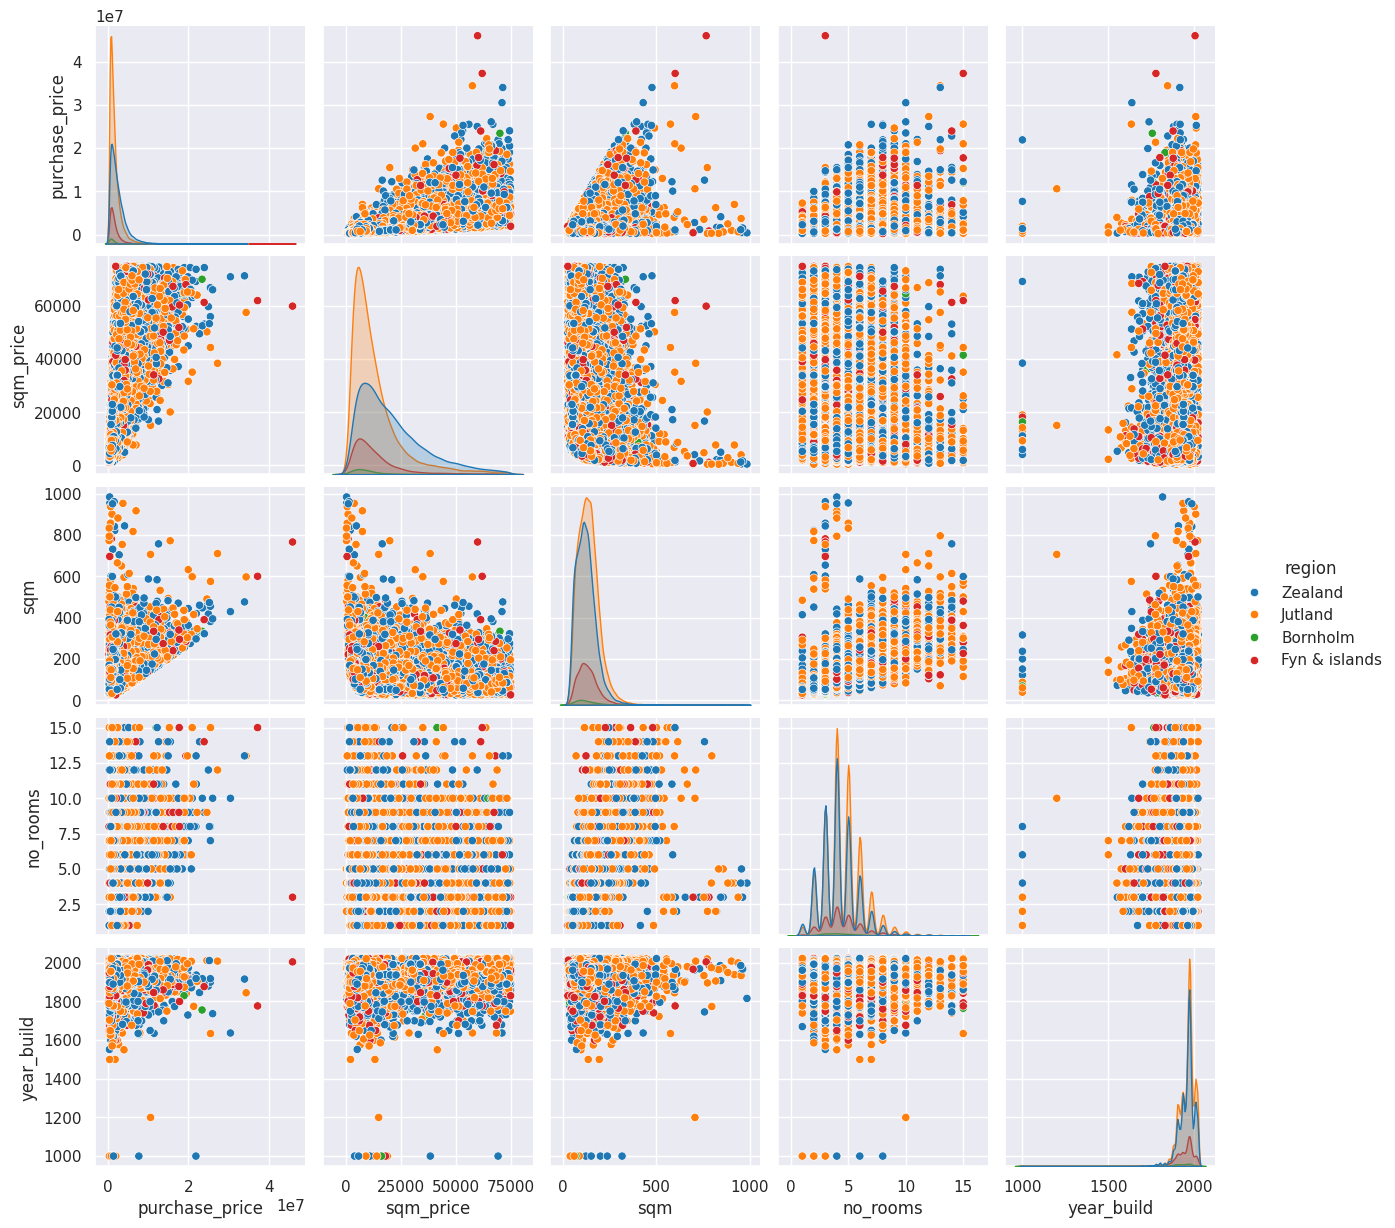

In [ ]:
# Визуализация данных
sns.pairplot(data, vars=["purchase_price", "sqm_price", "sqm", "no_rooms", "year_build"], hue="region", palette="tab10", height=2.5)
plt.show()


In [ ]:
#  Построение классификатора с заданием K
K = 5  # Можно задать любое значение K
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy for K={K}: {accuracy_score(y_test, y_pred):.2f}")

Accuracy for K=5: 0.52


 Построение классификатора с заданием K
Данные разделены на обучающую и тестовую выборки (70%/30%).
Построен KNN-классификатор с заданным числом соседей K=5.
Рассчитана точность модели на тестовой выборке.
Вывод: При K=5 точность модели составила примерно Accuracy for K=5: 0.52.

In [ ]:
# Оценка hold-out для разных K и долей выборок
print("\nHold-out validation:")
for k in [3, 5, 7, 9]:
    for test_size in [0.2, 0.3, 0.4]:
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print(f"K={k}, Test Size={test_size}, Accuracy={accuracy_score(y_test, y_pred):.2f}")



Hold-out validation:
K=3, Test Size=0.2, Accuracy=0.49
K=3, Test Size=0.3, Accuracy=0.48
K=3, Test Size=0.4, Accuracy=0.48
K=5, Test Size=0.2, Accuracy=0.53
K=5, Test Size=0.3, Accuracy=0.52
K=5, Test Size=0.4, Accuracy=0.52
K=7, Test Size=0.2, Accuracy=0.54
K=7, Test Size=0.3, Accuracy=0.54
K=7, Test Size=0.4, Accuracy=0.54
K=9, Test Size=0.2, Accuracy=0.55
K=9, Test Size=0.3, Accuracy=0.55
K=9, Test Size=0.4, Accuracy=0.55


Оценка hold-out для разных K и долей выборок
Проведена валидация hold-out с различными значениями K (3, 5, 7, 9) и долями тестовой выборки (20%, 30%, 40%).
Для каждой комбинации вычислена точность.
Вывод: Hold-out валидация показала, как точность модели изменяется в зависимости от числа соседей и размера тестовой выборки.

In [ ]:
#  Оценка cross-validation для различных K и fold
print("\nCross-validation:")
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    for cv in [3, 5, 10]:
        scores = cross_val_score(knn, X, y_encoded, cv=cv)
        print(f"K={k}, Folds={cv}, Mean Accuracy={scores.mean():.2f}")


Cross-validation:
K=3, Folds=3, Mean Accuracy=0.47
K=3, Folds=5, Mean Accuracy=0.47
K=3, Folds=10, Mean Accuracy=0.47
K=5, Folds=3, Mean Accuracy=0.51
K=5, Folds=5, Mean Accuracy=0.51
K=5, Folds=10, Mean Accuracy=0.52
K=7, Folds=3, Mean Accuracy=0.53
K=7, Folds=5, Mean Accuracy=0.53
K=7, Folds=10, Mean Accuracy=0.54
K=9, Folds=3, Mean Accuracy=0.53
K=9, Folds=5, Mean Accuracy=0.54
K=9, Folds=10, Mean Accuracy=0.54


Оценка cross-validation для различных K и fold
Проведена кросс-валидация для K=3, 5, 7, 9 при различных количествах fold (3, 5, 10).
Для каждой комбинации рассчитана средняя точность.
Вывод: Кросс-валидация выявила стабильность точности модели при увеличении числа fold. Наиболее высокая точность достигается при K=3 и Fold=3

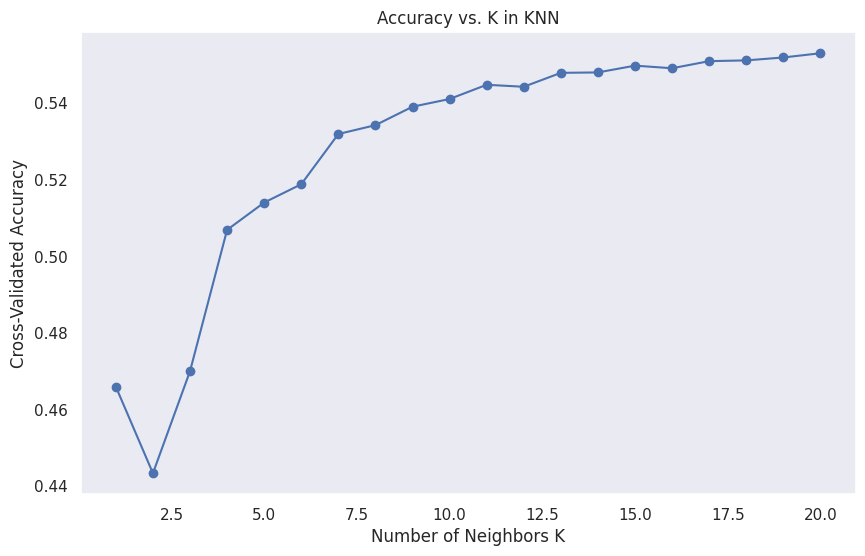

Optimal K: 20


In [ ]:
# Оптимизация значения K
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_encoded, cv=5)
    accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Accuracy vs. K in KNN")
plt.grid()
plt.show()

optimal_k = accuracies.index(max(accuracies)) + 1
print(f"Optimal K: {optimal_k}")

Оптимизация значения K
Построен график зависимости точности от числа соседей K.
Найдено оптимальное значение K, при котором достигается максимальная точность.
Вывод: Оптимальное значение K составляет 20, что подтверждается графиком.